# 1.Change the color and width of edges in NetworkX graphs according to edge attributes

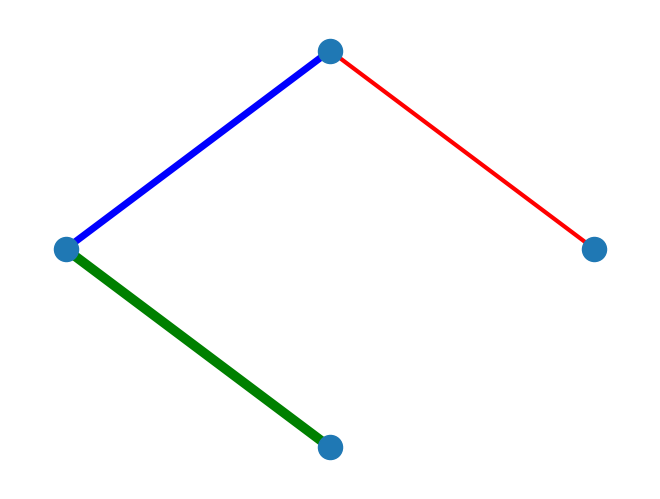

In [118]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1, 2, color='r' ,weight=3)
G.add_edge(2, 3, color='b', weight=5)
G.add_edge(3, 4, color='g', weight=7)

pos = nx.circular_layout(G)

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

nx.draw(G, pos, edge_color=colors, width=list(weights))

plt.show()

# 2.1 Color nodes in NetworkX graphs

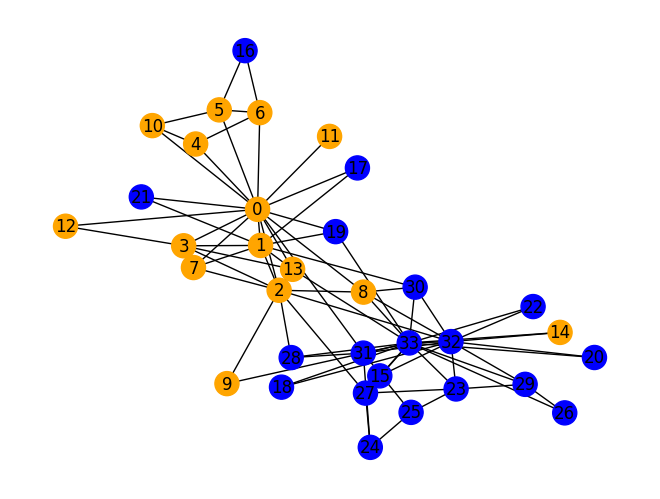

In [119]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
color_map = []
for node in G:
    if node < 15:
        color_map.append('orange')
    else: 
        color_map.append('blue')      

nx.draw(G, node_color=color_map, with_labels=True)

plt.show()

# 2.2 Color nodes in NetworkX graphs according to their attributes

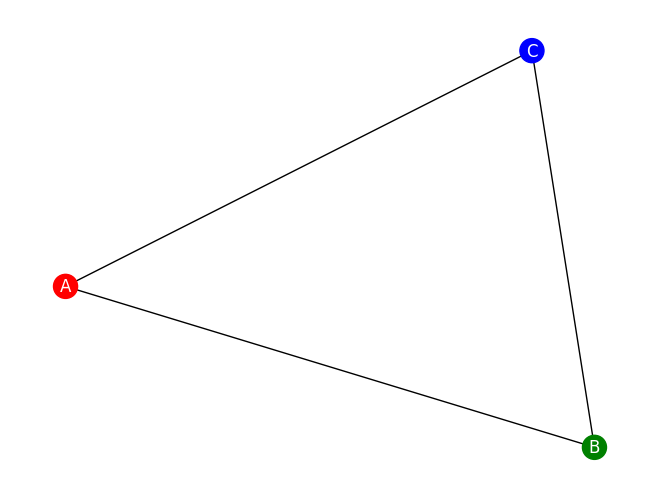

In [120]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node('A', color='red')
G.add_node('B', color='green')
G.add_node('C', color='blue')

G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('B', 'C')])

colors = [node[1]['color'] for node in G.nodes(data=True)]

nx.draw(G, node_color=colors, with_labels=True, font_color='white')

plt.show()

# 3. Graph Layouts

## 3.1. Circular layout

In [122]:
#Construct a graph
g = nx.Graph()
 
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 5)
g.add_edge(1, 4)
g.add_edge(2, 5)
g.add_edge(5, 6)
g.add_edge(5, 8)
g.add_edge(4, 8)
g.add_edge(3, 8)

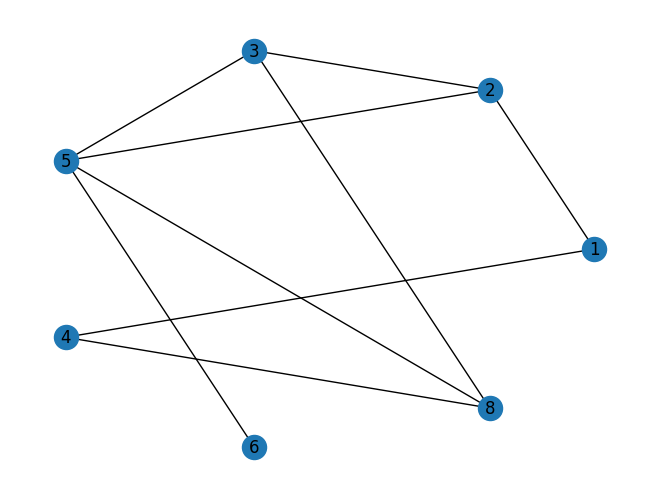

In [123]:
nx.draw_circular(g, with_labels = True)

## 3.2. Random layout

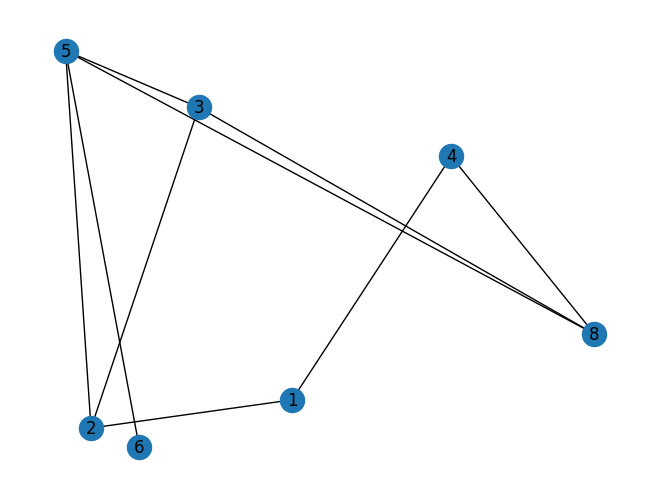

In [124]:
nx.draw_random(g, with_labels = True)

## 3.3. Spring layout

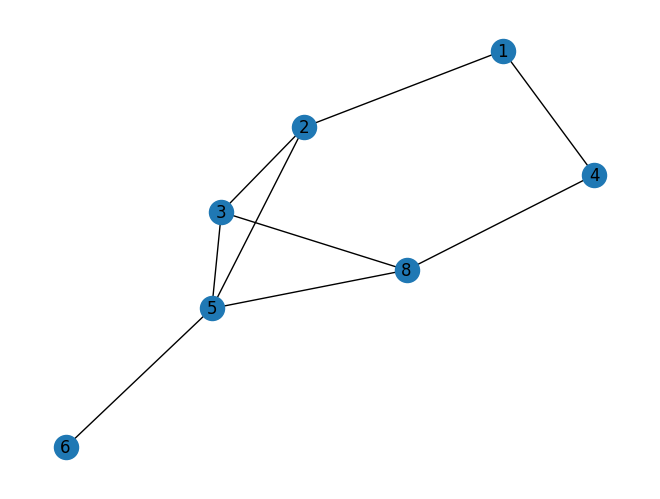

In [125]:
nx.draw_spring(g, with_labels = True)

## 3.4. Planar layout

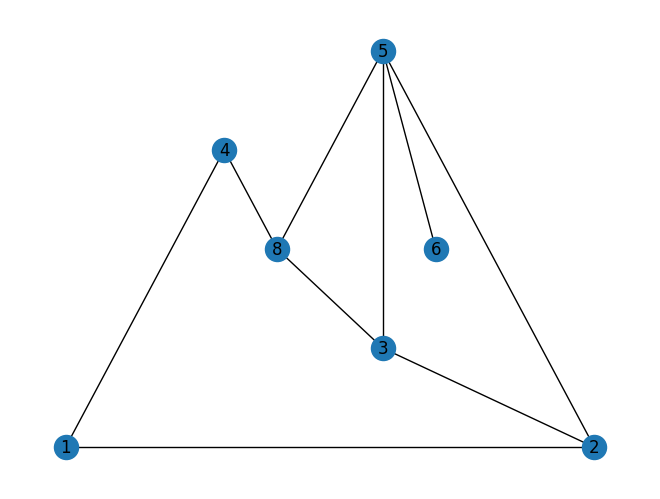

In [126]:
nx.draw_planar(g, with_labels = True)

## 3.5. Spectral layout

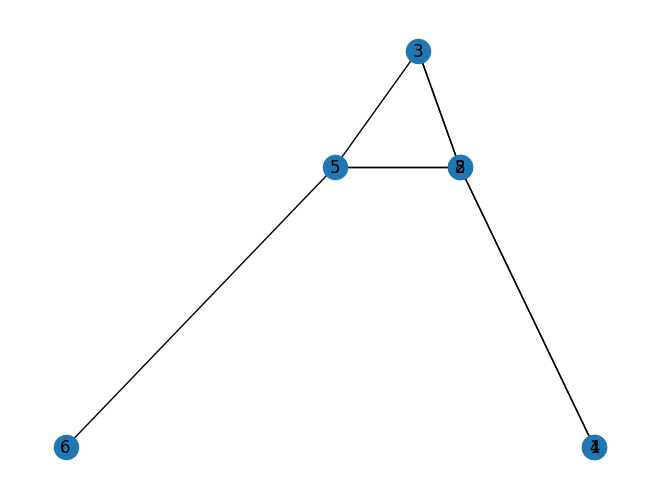

In [127]:
nx.draw_spectral(g, with_labels = True)

## 3.6. Shell layout

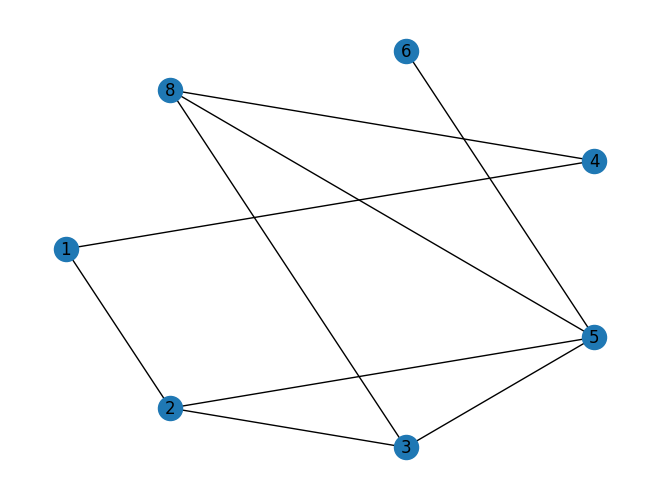

In [128]:
nx.draw_shell(g, with_labels = True)

# 4. Real world graph

## 4.1 Facebook social network
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks.

In [129]:
def load_dataset(file_path):
    data_file = open(file_path)
    edge_list = map(lambda x:tuple(map(int,x.split())),data_file.read().split("\n")[:-1])
    return edge_list

data_path = "data/facebook_combined.txt"
edge_list = load_dataset(data_path)

full_graph = nx.Graph(edge_list)

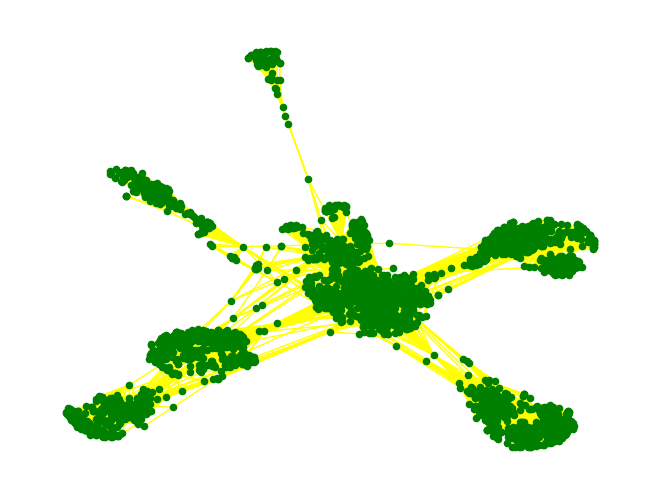

In [130]:
options = {
    'node_color': 'green',      # color of node
    'node_size': 20,            # size of node
    'width': 1,                 # line width of edges
    'edge_color':'yellow',         # edge color
}

nx.draw(full_graph, **options)

### Check node degree

(array([3.59e+03, 4.26e+02, 1.80e+01, 1.00e+00, 0.00e+00, 1.00e+00,
        0.00e+00, 2.00e+00, 0.00e+00, 1.00e+00]),
 array([1.000e+00, 1.054e+02, 2.098e+02, 3.142e+02, 4.186e+02, 5.230e+02,
        6.274e+02, 7.318e+02, 8.362e+02, 9.406e+02, 1.045e+03]),
 <BarContainer object of 10 artists>)

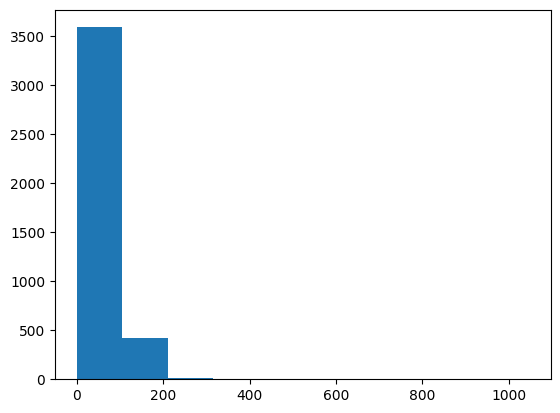

In [131]:
#Degree plot for undirected and weighted graph
degrees = [full_graph.degree(n) for n in full_graph.nodes()]

plt.hist(degrees)

### Centrality measurement

In [132]:
# get the local cluster coefficient in dataframe format
def get_graph_centrality(graph, method):
    centrality = pd.DataFrame(sorted(method(graph).items(), 
                                 key=lambda item: -item[1]), 
    columns = ["node", "centrality score"])
    
    return centrality


### Degree Centrality

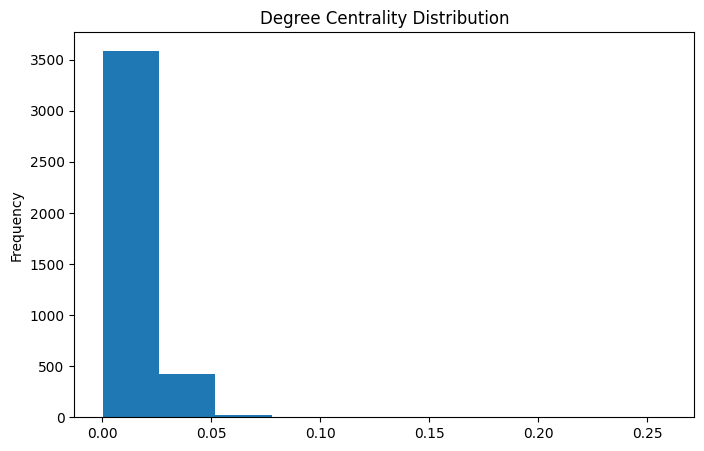

In [133]:
centrality = get_graph_centrality(full_graph, nx.degree_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Degree Centrality Distribution");

### Eigenvector Centrality

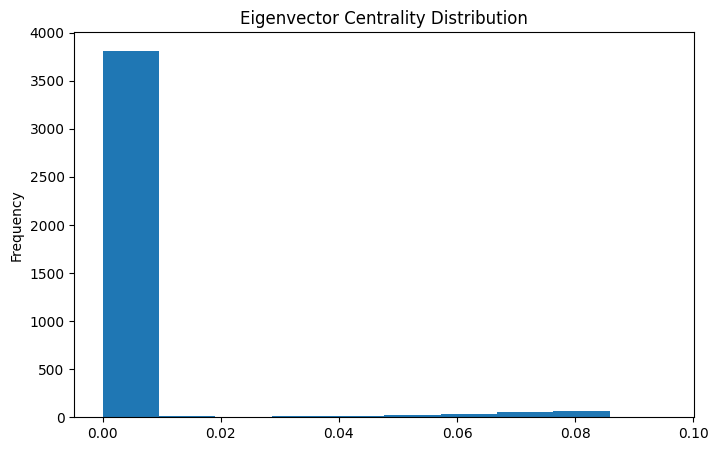

In [134]:
centrality = get_graph_centrality(full_graph, nx.eigenvector_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Eigenvector Centrality Distribution");

### Closeness centrality

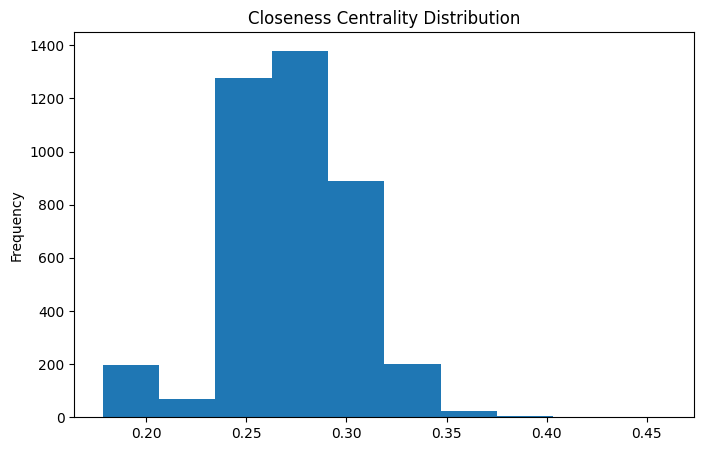

In [135]:
centrality = get_graph_centrality(full_graph, nx.closeness_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Closeness Centrality Distribution");

### Betweenness centrality

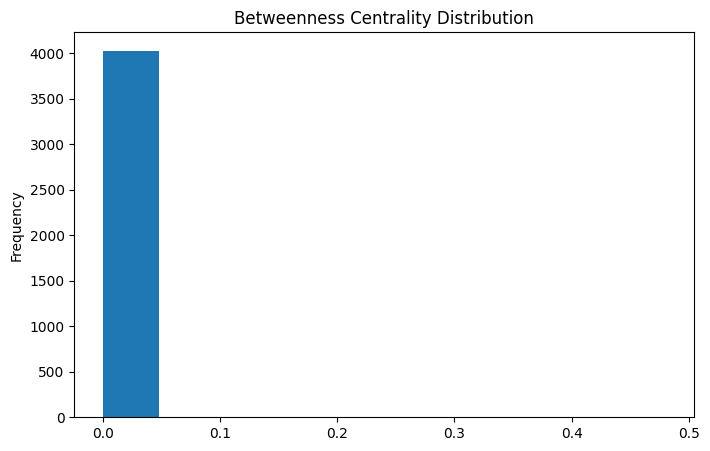

In [136]:
centrality = get_graph_centrality(full_graph, nx.betweenness_centrality)
centrality["centrality score"].plot.hist(figsize=(8,5), title="Betweenness Centrality Distribution");

### Visualize graph with betweenness centrality

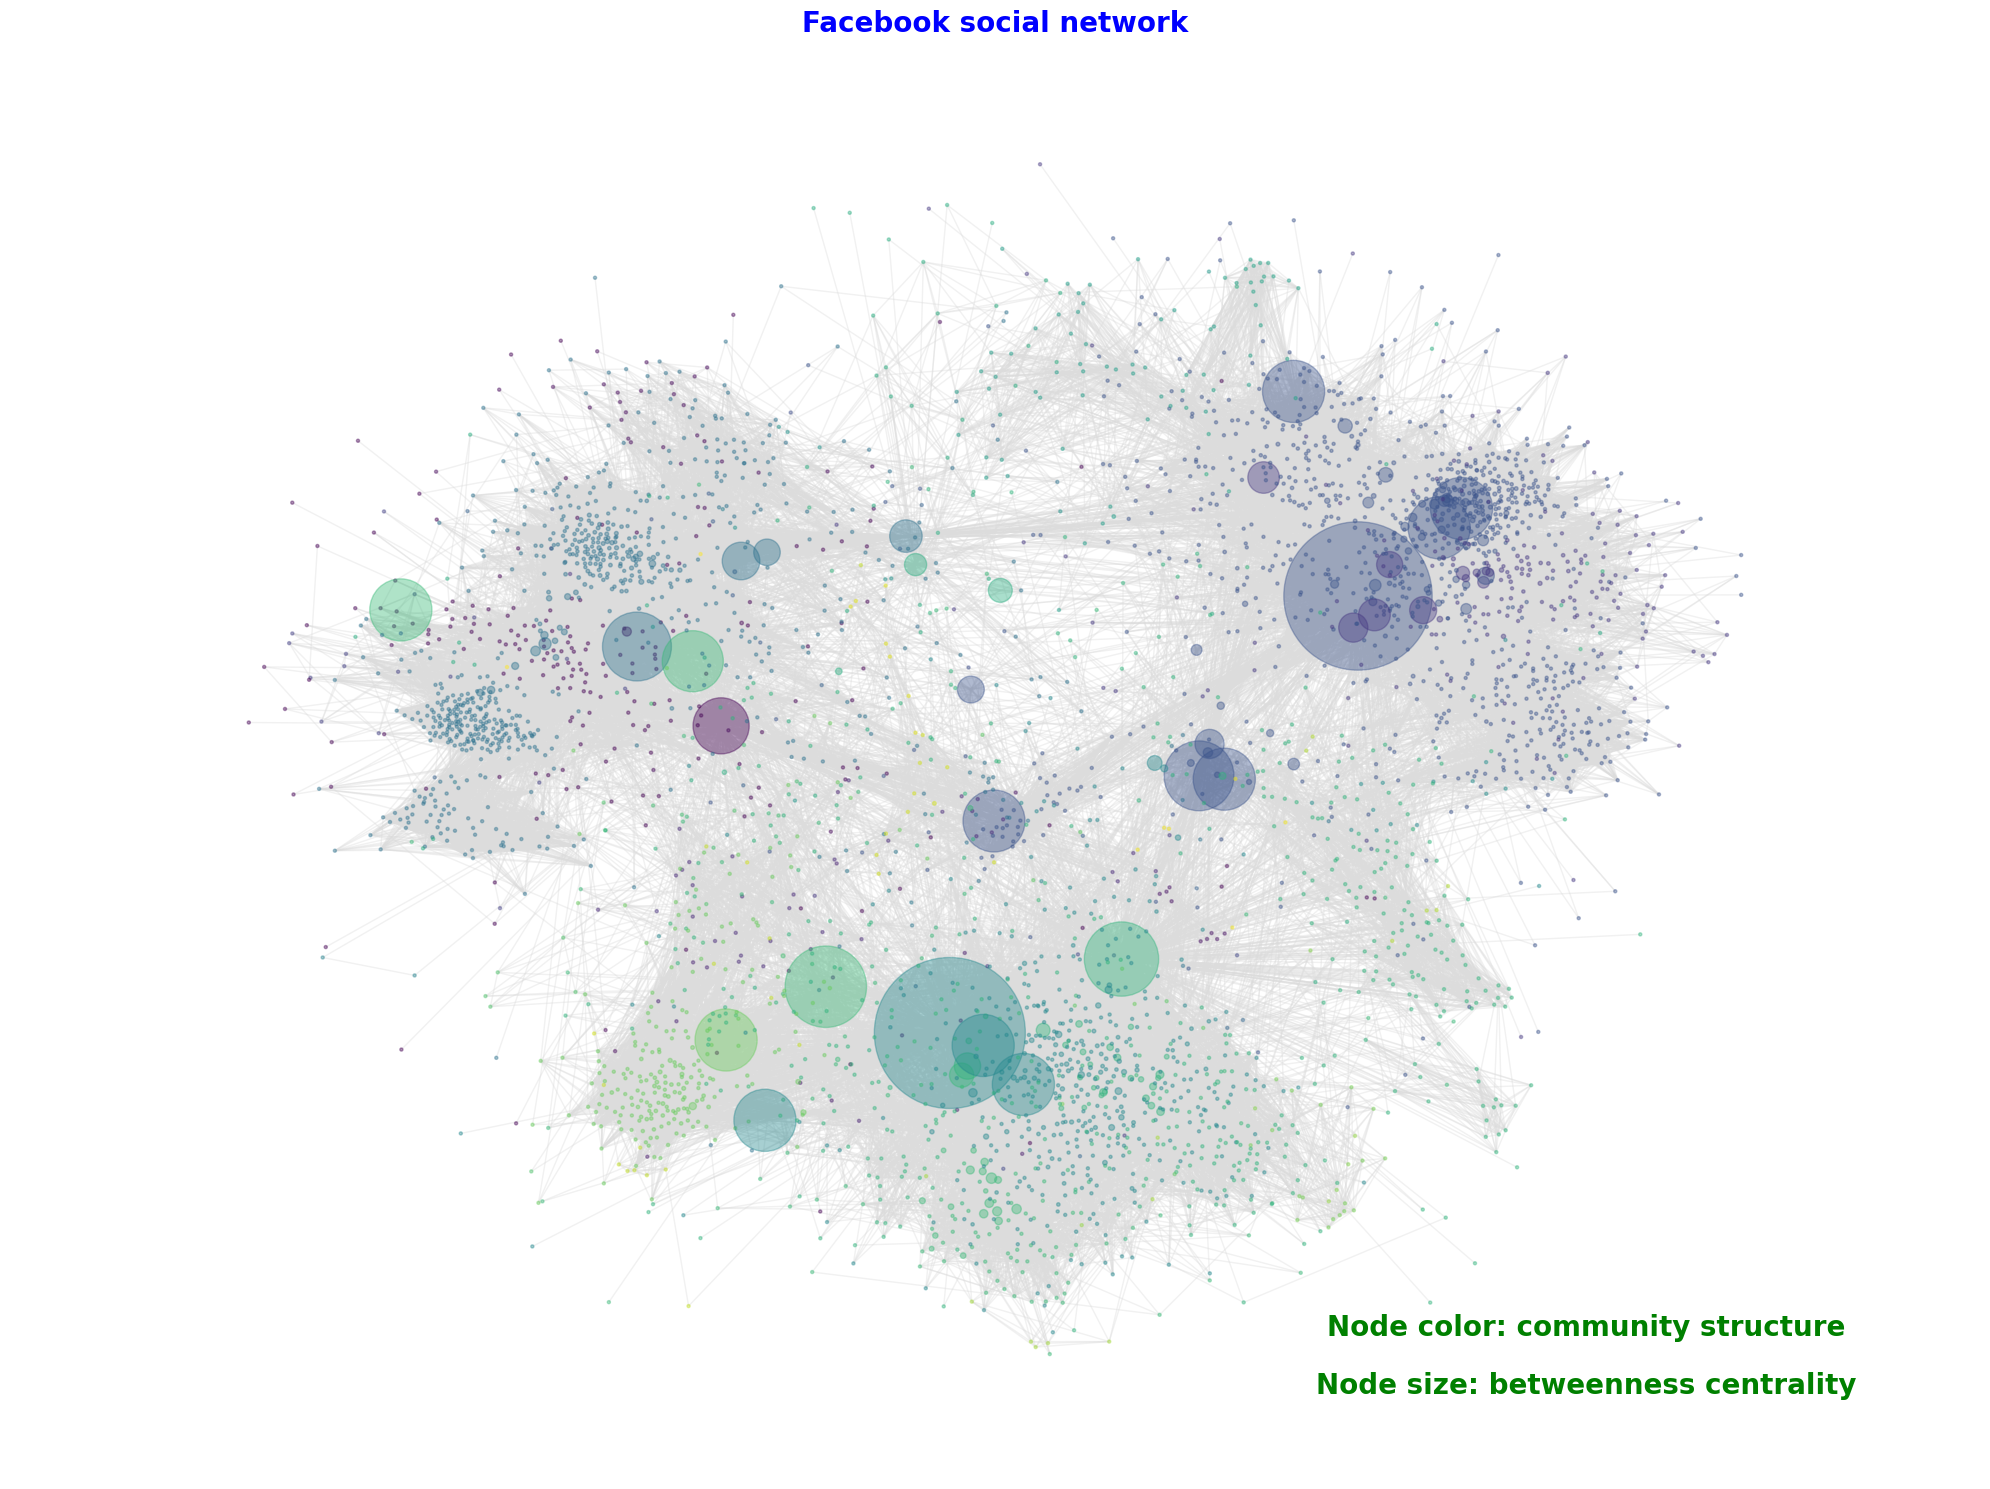

In [137]:
# largest connected component
def get_largest_component(G):
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    largest_subgraph = G.subgraph(largest_component)
    
    return largest_subgraph

def draw_graph_betweenness_centrality(G, largest_component):
    # Calculate betweenness centrality
    centrality = nx.betweenness_centrality(largest_component, k=10, endpoints=True)

    # Compute community structure
    lpc = nx.community.label_propagation_communities(largest_component)
    community_index = {n: i for i, com in enumerate(lpc) for n in com}

    # Draw graph using matplotlib
    fig, ax = plt.subplots(figsize=(20, 15))
    pos = nx.spring_layout(largest_component, k=0.15, seed=4572321)
    node_color = [community_index[n] for n in largest_component]
    node_size = [v * 20000 for v in centrality.values()]
    
    # Customize graph style
    nx.draw_networkx(
        largest_component,
        pos=pos,
        with_labels=False,
        node_color=node_color,
        node_size=node_size,
        edge_color="gainsboro",
        alpha=0.4,
    )

    # Title/legend
    font = {"color": "blue", "fontweight": "bold", "fontsize": 20}
    ax.set_title("Facebook social network", font)
    
    # Change font color for legend
    font["color"] = "green"

    ax.text(
        0.80,
        0.10,
        "Node color: community structure",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )
    ax.text(
        0.80,
        0.06,
        "Node size: betweenness centrality",
        horizontalalignment="center",
        transform=ax.transAxes,
        fontdict=font,
    )

    # Resize figure for label readability
    ax.margins(0.1, 0.05)
    fig.tight_layout()
    plt.axis("off")
    plt.show()
    
# Read graph data from edgelist
largest_component = get_largest_component(full_graph)
draw_graph_betweenness_centrality(full_graph, largest_component)

## 4.2 Molecular dataset

###  Transforming smiles codes in molecular dataset to graphs

num                                                      26
name                                               androsan
p_np                                                      0
smiles    C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[...
Name: 25, dtype: object


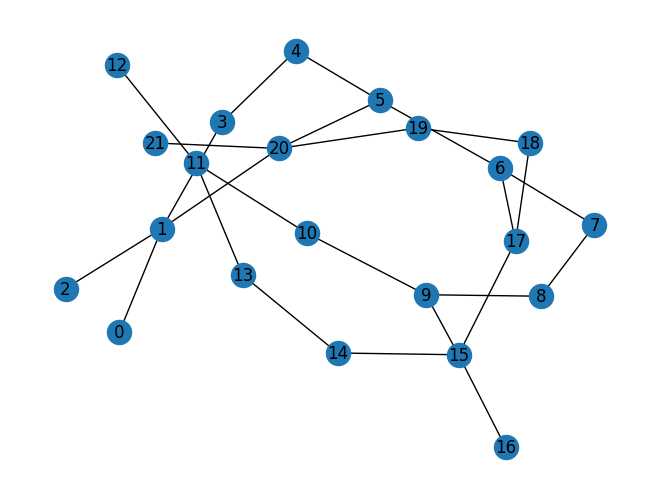

In [138]:
# Convert SMILES strings to graphs
import numpy as np
import pandas as pd
import networkx as nx
from rdkit import Chem
from rdkit import RDLogger

# Read the dataset 
df = pd.read_csv('./data/Molecular_Sample.csv')

# Display the first row of the dataset
print(df.iloc[25])

graphs = []
for smiles in df['smiles']:
    mol = Chem.MolFromSmiles(smiles, sanitize=False)
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond_type=bond.GetBondType())
    graphs.append(G)
    
#Visualize the first graph
nx.draw(graphs[25], with_labels=True)

In [140]:
print(df.iloc[0:25])


    num                  name  p_np  \
0     1            Propanolol     1   
1     2  Terbutylchlorambucil     1   
2     3                Y-G 20     0   
3     4           cloxacillin     1   
4     5          cefoperazone     1   
5     6      rolitetracycline     1   
6     7           ondansetron     1   
7     8             diltiazem     1   
8     9             Amiloride     1   
9    10            M2L-663581     0   
10   11             alovudine     1   
11   12             methadone     1   
12   13            alfentanil     1   
13   14              BRL53080     1   
14   15           hyoscyamine     1   
15   16             glyburide     1   
16   17           lamotrigine     1   
17   18            MIL-663581     0   
18   19      acetylsalicylate     0   
19   20           allopurinol     0   
20   21           Alprostadil     0   
21   22         aminophylline     0   
22   23            Amiodarone     0   
23   24           amoxicillin     0   
24   25            ampici

### Visualize Molecular Structures from SMILES Strings

Propanolol


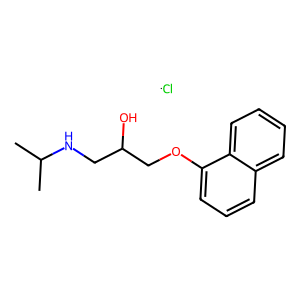

Terbutylchlorambucil


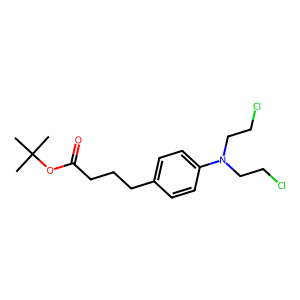

Y-G 20


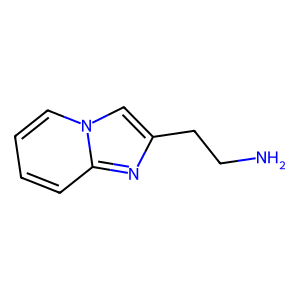

cloxacillin


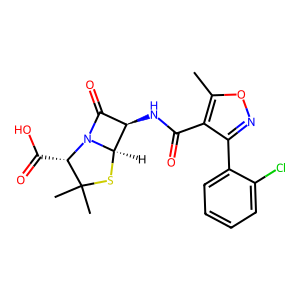

cefoperazone


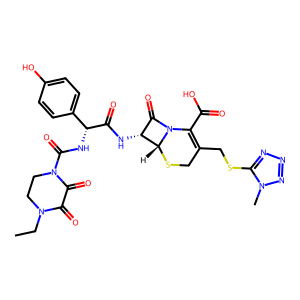

rolitetracycline


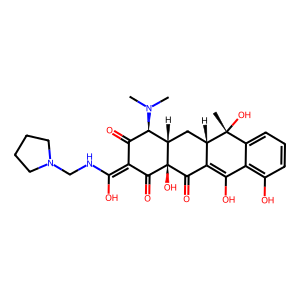

ondansetron


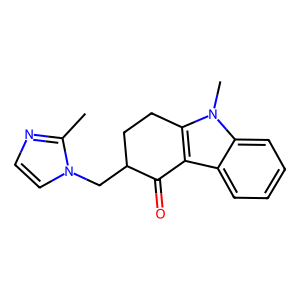

diltiazem


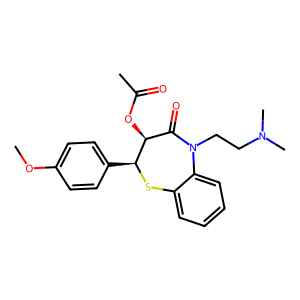

Amiloride


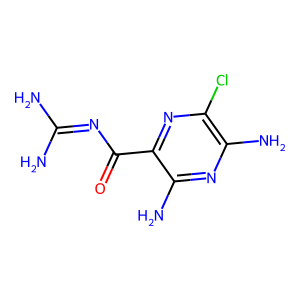

M2L-663581


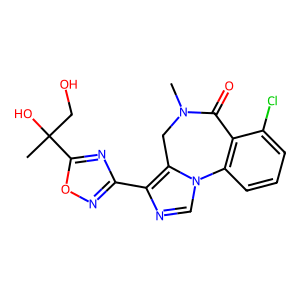

alovudine


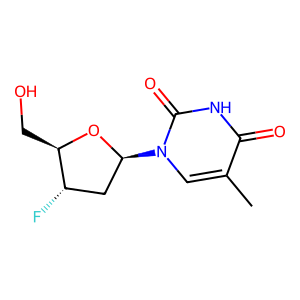

methadone


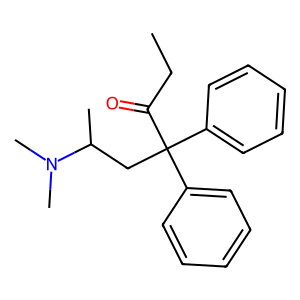

alfentanil


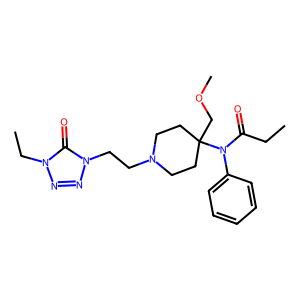

BRL53080


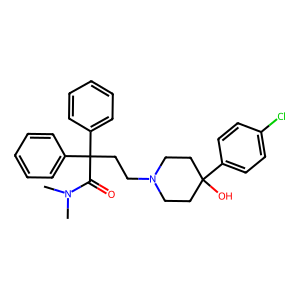

hyoscyamine


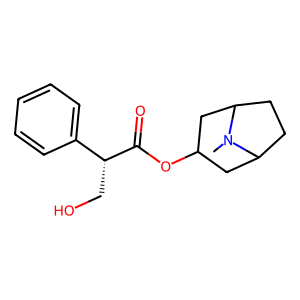

glyburide


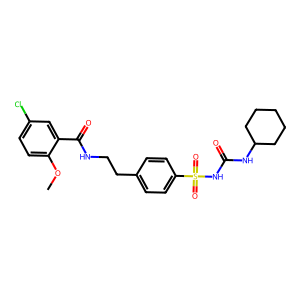

lamotrigine


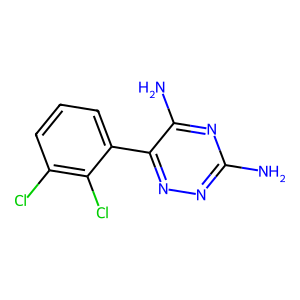

MIL-663581


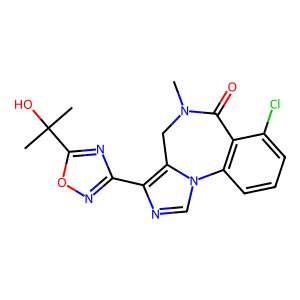

acetylsalicylate


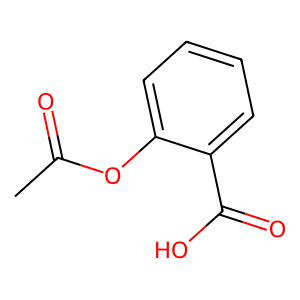

allopurinol


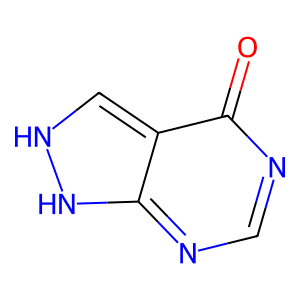

Alprostadil


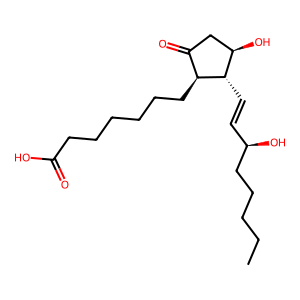

aminophylline


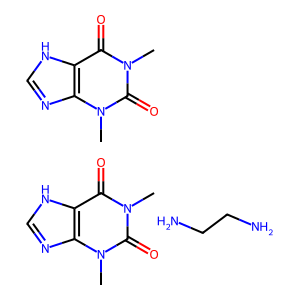

Amiodarone


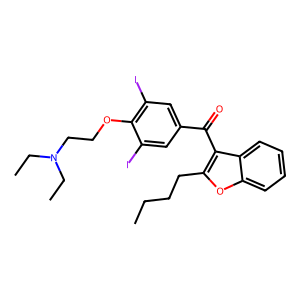

amoxicillin


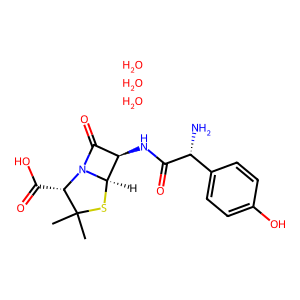

ampicillin


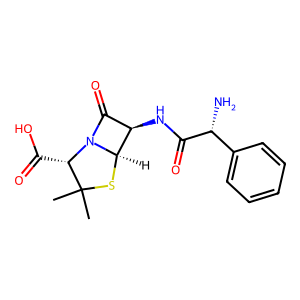

androsan


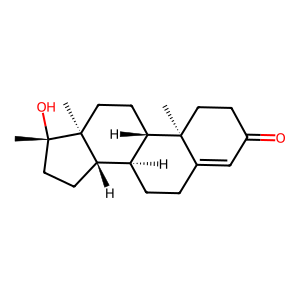

In [188]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Visualize each molecule
for idx, row in data.iterrows():
    smiles = row['smiles']
    name = row['name']
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Generate image
        img = Draw.MolToImage(mol, size=(300, 300))
        # Display the image
        print(name)
        display(img)


### Node-Based Feature Propagation with SVM Classifier

#### Get Adjanceny matrix of each smile, then sum of atom types as a node feature, finally aggregate node features by sum

In [142]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (example: sum of atom types)
node_features = []
for graph in graphs:
    features = np.sum(graph, axis=1)
    node_features.append(features)

# Aggregate node features (sum)
aggregated_features = [np.sum(features, axis=0) for features in node_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)

# Reshape the input arrays
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Train SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.16666666666666666


In [143]:
node_features

[array([0, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3]),
 array([3, 1, 2, 4, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2,
        1]),
 array([2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1]),
 array([1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 4, 1, 1,
        3, 3, 3, 1, 3, 1, 1]),
 array([1, 2, 3, 2, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1,
        3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 3, 1, 2, 2, 3, 1, 3, 1]),
 array([1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2, 3, 4, 1, 1, 3, 1,
        4, 1, 3, 1, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1]),
 array([1, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 3]),
 array([1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 1, 1,
        3, 1, 3, 2, 3, 1, 1]),
 array([1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1]),
 array([1, 2, 4, 1, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 2, 2,
        2, 3, 1, 1, 2]),
 array([1, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 1, 2, 3, 1]),
 array([1, 2, 

In [144]:
aggregated_features

[40,
 46,
 26,
 64,
 96,
 84,
 50,
 62,
 30,
 60,
 36,
 48,
 64,
 74,
 46,
 70,
 34,
 58,
 26,
 22,
 50,
 62,
 66,
 54,
 52,
 50]

### Node-Based Feature Propagation with SVM Classifier

#### Get Adjanceny matrix of each smile, then sum of atom types as a node feature, finally aggregate node features by max

In [145]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (example: sum of atom types)
node_features = []
for graph in graphs:
    features = np.sum(graph, axis=1)
    node_features.append(features)

# Aggregate node features (max)
aggregated_features = [np.max(features, axis=0) for features in node_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)

# Reshape the input arrays
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Train SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [146]:
aggregated_features

[3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4]

### Node-Based Feature Propagation with SVM Classifier

#### Get Adjanceny matrix of each smile, then sum of atom types as a node feature, finally aggregate node features by min

In [180]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (example: sum of atom types)
node_features = []
for graph in graphs:
    features = np.sum(graph, axis=1)
    node_features.append(features)

# Aggregate node features (min)
aggregated_features = [np.min(features, axis=0) for features in node_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)

# Reshape the input arrays
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Train SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [182]:
node_features

[array([0, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3]),
 array([3, 1, 2, 4, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2,
        1]),
 array([2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1]),
 array([1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 4, 1, 1,
        3, 3, 3, 1, 3, 1, 1]),
 array([1, 2, 3, 2, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1,
        3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 3, 1, 2, 2, 3, 1, 3, 1]),
 array([1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2, 3, 4, 1, 1, 3, 1,
        4, 1, 3, 1, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1]),
 array([1, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 3]),
 array([1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 1, 1,
        3, 1, 3, 2, 3, 1, 1]),
 array([1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1]),
 array([1, 2, 4, 1, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 2, 2,
        2, 3, 1, 1, 2]),
 array([1, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 1, 2, 3, 1]),
 array([1, 2, 

In [181]:
aggregated_features

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

### Node-Based Feature Propagation with SVM Classifier

#### Get Adjanceny matrix of each smile, then extract node features with degree, betweenness, closeness centralities, finally aggregate node features by sum

In [171]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import networkx as nx

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (degree centrality, betweenness centrality, closeness centrality)
node_features = []
for graph in graphs:
    G = nx.from_numpy_array(graph)
    degree_centrality = list(nx.degree_centrality(G).values())
    betweenness_centrality = list(nx.betweenness_centrality(G).values())
    closeness_centrality = list(nx.closeness_centrality(G).values())
    features = np.column_stack((degree_centrality, betweenness_centrality, closeness_centrality))
    node_features.append(features)

# Aggregate node features (sum)
aggregated_features = [np.sum(features, axis=0) for features in node_features]

# Reshape the input arrays
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)
X_train_reshaped = np.array(X_train).reshape(-1, 3)  # 3 centrality features
X_test_reshaped = np.array(X_test).reshape(-1, 3)

# Train SVM classifier
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [172]:
node_features

[array([[0.        , 0.        , 0.        ],
        [0.05263158, 0.        , 0.14329943],
        [0.15789474, 0.19298246, 0.16718266],
        [0.05263158, 0.        , 0.14329943],
        [0.10526316, 0.26315789, 0.1916026 ],
        [0.10526316, 0.32748538, 0.21862348],
        [0.15789474, 0.4502924 , 0.24713959],
        [0.05263158, 0.        , 0.19828641],
        [0.10526316, 0.4502924 , 0.26644737],
        [0.10526316, 0.46783626, 0.27955134],
        [0.15789474, 0.50877193, 0.28421053],
        [0.10526316, 0.09551657, 0.23359769],
        [0.10526316, 0.04288499, 0.20795892],
        [0.10526316, 0.03508772, 0.19600726],
        [0.15789474, 0.18908382, 0.23044097],
        [0.10526316, 0.06140351, 0.19600726],
        [0.10526316, 0.0165692 , 0.17052632],
        [0.10526316, 0.04288499, 0.18739156],
        [0.10526316, 0.11403509, 0.21862348],
        [0.15789474, 0.37329435, 0.26234818]]),
 array([[0.13636364, 0.43722944, 0.18333333],
        [0.04545455, 0.        ,

In [160]:
aggregated_features

[array([2.10526316, 3.63157895, 4.04254446]),
 array([2.09090909, 5.36363636, 4.06992637]),
 array([2.36363636, 2.38181818, 4.18924295]),
 array([2.28571429, 4.77777778, 5.50397007]),
 array([2.23255814, 7.12846069, 5.88289455]),
 array([2.27027027, 5.05855856, 6.86261594]),
 array([2.38095238, 3.64761905, 5.29001965]),
 array([2.21428571, 4.42063492, 5.95088836]),
 array([2.14285714, 2.89010989, 4.45739617]),
 array([2.30769231, 4.23384615, 5.69841346]),
 array([2.25      , 3.075     , 4.75670777]),
 array([2.18181818, 3.42424242, 5.82326036]),
 array([2.20689655, 5.33004926, 5.24740469]),
 array([2.24242424, 5.48674242, 5.73996797]),
 array([2.3       , 3.94210526, 4.75366541]),
 array([2.1875    , 6.99596774, 4.52908852]),
 array([2.26666667, 2.82857143, 4.76765233]),
 array([2.32      , 4.04333333, 5.70379201]),
 array([2.16666667, 2.54545455, 4.29420005]),
 array([2.44444444, 1.66666667, 4.37969463]),
 array([2.08333333, 5.75362319, 4.19601655]),
 array([2.13793103, 0.66502463, 4.

### Graph Visualization with PCA

#### Extract node features from each graph: degree centrality, betweenness centrality, and closeness centrality. These features are then aggregated (summed) for each graph.

#### The aggregated features are used as input (X) and the 'p_np' column from the data is used as the target variable (y).

#### Apply PCA to the input data to reduce its dimensionality to 2. PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize

#### Visualize the transformed data using a scatter plot. The x and y coordinates of each point are the two principal components obtained from PCA. The color of each point represents its target value ('p_np'), with the color scale shown on the right.

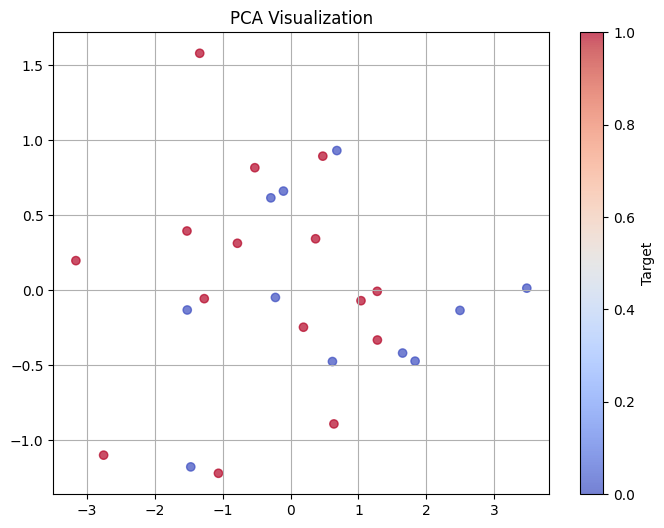

In [4]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import networkx as nx
from rdkit import Chem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (degree centrality, betweenness centrality, closeness centrality)
node_features = []
for graph in graphs:
    G = nx.from_numpy_array(graph)
    degree_centrality = list(nx.degree_centrality(G).values())
    betweenness_centrality = list(nx.betweenness_centrality(G).values())
    closeness_centrality = list(nx.closeness_centrality(G).values())
    features = np.column_stack((degree_centrality, betweenness_centrality, closeness_centrality))
    node_features.append(features)

# Aggregate node features (sum)
aggregated_features = [np.sum(features, axis=0) for features in node_features]

# Reshape the input arrays
X = np.array(aggregated_features)
y = data['p_np']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('')
plt.ylabel('')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


### Anomaly Detection in Molecular Structures Using Graph Density and Isolation Forest

In [190]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from rdkit import Chem
import networkx as nx

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

if not graphs:
    print("No valid molecular graphs found in the dataset.")
else:
    # Compute graph density for each molecular graph
    densities = [nx.density(nx.from_numpy_array(graph)) for graph in graphs]

    # Reshape the density values for input to Isolation Forest
    X = np.array(densities).reshape(-1, 1)

    # Train Isolation Forest
    isolation_forest = IsolationForest(contamination=0.1)  # Expected anomaly rate
    isolation_forest.fit(X)

    # Predict anomaly scores
    anomaly_scores = isolation_forest.decision_function(X)

    # Identify anomalies
    anomalies = data.loc[anomaly_scores < 0]

    # Print identified anomalies
    print("Identified anomalies:")
    print(anomalies)


Identified anomalies:
    num          name  p_np                                             smiles
2     3        Y-G 20     0                                 c1cccn2c1nc(c2)CCN
4     5  cefoperazone     1  CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(=C(...
19   20   allopurinol     0                                 O=C1N=CN=C2NNC=C12
